In [135]:
import os
import sys
import numpy as np
import math
import copy
import torch
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [24]:
sys.path.insert(0, '..')

In [205]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from symnorm.pipeline.symNormPipeline import SymNormPipeline

In [204]:
from plot.plot_symNorm import *

In [167]:
n = 400

In [166]:
for i in range(n):
    


400

### MLoop

In [208]:
# sys.argv = ["main", "--config", "/home/swei20/SymNormSlidingWindows/configs/mLConfigs.json", "--debug", "--test"]
sys.argv = ["main", "--config", "/home/swei20/SymNormSlidingWindows/configs/mLConfigs.json", "--debug"]

mp=SymNormPipeline()
mp.prepare()
mp.run()

INFO:root:Output directory not Empty, Replacing might occurs
INFO:root:Output directory not Empty, Replacing might occurs
INFO:root:Creating Coord Update Stream...
INFO:root:Eval Stream Norms...
INFO:root:sketching
INFO:root:|errCs: 0.17 | errUS: 2.06 | errUU: 0.68 | normEx: 5.657 | normCs: 4.699999809265137 | normUS: 17.32 | stdUS: 0.0
INFO:root:|errCs: 0.17 | errUS: 2.06 | errUU: 0.68 | normEx: 5.657 | normCs: 4.699999809265137 | normUS: 17.32 | stdUS: 0.0
INFO:root:sketching
INFO:root:|errCs: 0.02 | errUS: 2.06 | errUU: 0.71 | normEx: 8.0 | normCs: 8.119999885559082 | normUS: 24.49 | stdUS: 0.0
INFO:root:|errCs: 0.3 | errUS: 2.06 | errUU: 0.71 | normEx: 8.0 | normCs: 5.610000133514404 | normUS: 24.49 | stdUS: 0.0
INFO:root:sketching
INFO:root:|errCs: 0.01 | errUS: 2.06 | errUU: 0.67 | normEx: 11.314 | normCs: 11.15999984741211 | normUS: 34.64 | stdUS: 0.0
INFO:root:|errCs: 0.43 | errUS: 2.06 | errUU: 0.67 | normEx: 11.314 | normCs: 6.489999771118164 | normUS: 34.64 | stdUS: 0.0
INFO

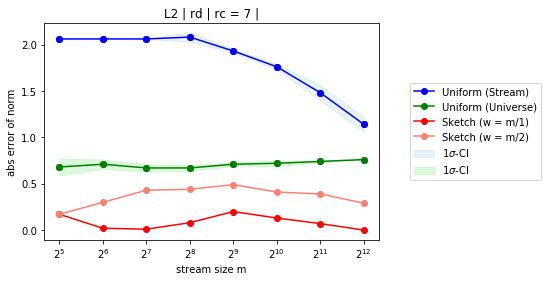

In [210]:
plot_mL(mp)

# SLoop

In [201]:
# sys.argv = ["main", "--config", "/home/swei20/SymNormSlidingWindows/configs/mLConfigs.json", "--debug", "--test"]
sys.argv = ["main", "--config", "/home/swei20/SymNormSlidingWindows/configs/sLConfigs.json", "--debug"]

cp=SymNormPipeline()
cp.prepare()
cp.run()

INFO:root:Output directory not Empty, Replacing might occurs
INFO:root:Output directory not Empty, Replacing might occurs
INFO:root:Creating Coord Update Stream...
INFO:root:Eval Stream Norms...
INFO:root:sketching
100%|██████████| 6/6 [00:02<00:00,  2.13it/s]
INFO:root:
    errCs    m  w  r    c  rc     ex     cs
0   0.00  256  1  4    4   4  25.22  25.13
1   0.17  256  1  4    8   5  25.22  29.43
2   0.16  256  1  4   16   6  25.22  21.16
3   0.04  256  1  4   32   7  25.22  26.29
4   0.01  256  1  4   64   8  25.22  25.57
5   0.03  256  1  4  128   9  25.22  26.09


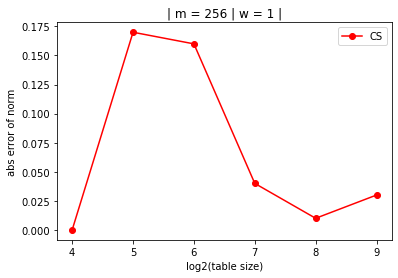

In [207]:
plot_sL(cp)

### dataloader

In [14]:
stream = np.append(np.arange(1, 3201), np.ones(70)*3201)

In [18]:
len(stream)

3270

In [12]:
m = 40
n = None
cut = int(m / 4)
s1 = np.arange(1, cut + 1)
if n is None: n = 10 * m
rd = np.random.randint(cut + 2, high=n + 1, size=m - 2 * cut)
coord = np.concatenate((s1, s1, rd))
coord[-int(0.1 * m):] = n

In [132]:
coord

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  93,  96,  65,  81, 329, 138,
        61, 102, 145,  62, 180, 108, 312,  78, 345, 101, 400, 400, 400,
       400])

In [138]:
freqVec = list(Counter(coord).values())
np.array(freqVec)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4])

In [133]:
self.get_norm_from_coord(coord)

8.48528137423857

In [ ]:
self.

In [148]:

    def create_HH_stream(self, m, n = None, shuffle=True):
        '''
        for m = 40, n = None, 
        coord = [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  93,  96,  65,  81, 329, 138,
        61, 102, 145,  62, 180, 108, 312,  78, 345, 101, 400, 400, 400, 400]
        '''
        cut = int(m / 4)
        s1 = np.arange(1, cut + 1)
        if n is None: n = 10 * m
        rd = np.random.randint(cut + 2, high=n + 1, size=m - 2 * cut)
        coord = np.concatenate((s1, s1, rd))
        # create heaviness = 0.1 Heavy Hitters
        nHH = np.min([0.1 * m, np.sqrt(m)])
        coord[-int(nHH):] = n
        self.n = n
        if shuffle: np.random.shuffle(coord)
        return coord

In [149]:
m = 100

In [168]:
coord = create_HH_stream(self,m, shuffle=0)
coord

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,    1,    2,    3,    4,    5,    6,    7,    8,
          9,   10,   11,   12,   13,   14,   15,   16,   17,   18,   19,
         20,   21,   22,   23,   24,   25,  341,  652,   79,  180,  826,
        395,  916,  896,  823,  474,   64,  440,  167,  506,  854,   73,
        847,  673,  989,  322,  813,  191,  893,  484,  409,  837,  988,
         96,  572,  482,  470,  440,  535,  589,  248,  615,  694,  433,
         83,  623, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000])

In [178]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [172]:
sampled_universe = np.random.randint(1, high=n + 1, size=int(0.1*n))

In [176]:
freqList = [c[item] for item in sampled_universe]

[0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [175]:
c

Counter({1: 2,
         2: 2,
         3: 2,
         4: 2,
         5: 2,
         6: 2,
         7: 2,
         8: 2,
         9: 2,
         10: 2,
         11: 2,
         12: 2,
         13: 2,
         14: 2,
         15: 2,
         16: 2,
         17: 2,
         18: 2,
         19: 2,
         20: 2,
         21: 2,
         22: 2,
         23: 2,
         24: 2,
         25: 2,
         341: 1,
         652: 1,
         79: 1,
         180: 1,
         826: 1,
         395: 1,
         916: 1,
         896: 1,
         823: 1,
         474: 1,
         64: 1,
         440: 2,
         167: 1,
         506: 1,
         854: 1,
         73: 1,
         847: 1,
         673: 1,
         989: 1,
         322: 1,
         813: 1,
         191: 1,
         893: 1,
         484: 1,
         409: 1,
         837: 1,
         988: 1,
         96: 1,
         572: 1,
         482: 1,
         470: 1,
         535: 1,
         589: 1,
         248: 1,
         615: 1,
         694: 1,
 

In [174]:
c['100']

0

In [173]:
c = Counter(coord)

In [169]:
freqVec = list(Counter(coord).values())
np.array(freqVec)

array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10])

In [151]:
coord

array([  10,   10,  897,   20,  709,  194,  117,   94,  858,   25,  384,
        600,  214,   22,    1,    4,   16,  387,  342,   24,  698,  923,
         21,   77, 1000,  991,   13,   14,   12,  523,    1,   18,    2,
         33,  767,  356,  925,  700, 1000,   18,  185, 1000,   13,  918,
          8,   17,   16,    3,    3,    5,  847,  792, 1000,    6,  743,
       1000,   22, 1000,  978,  999,   12,  441,   15,   19,  626,  129,
          9,  389,   25,   11,    2,    7, 1000,   21,    9,   20, 1000,
         24,  357,   23,    4,    8,   14,  444,   17,  999,    5,  973,
        278,   11, 1000,   19,  131,    7,    6,   15,  581,   23, 1000,
        667])

In [140]:
m = 100
coord100 = self.create_HH_stream(m, n = None)
coord100

array([ 100,  904,   16,   10, 1000,  363,    8,  520,  806,    9,   20,
         12,  485,    1,  896,   10, 1000,   22,  552,    8,  593,    3,
         12,   11,   22,   21,  612,  485,   11,   25,  712,  852,  199,
         17,  714,    7,  641,  338, 1000,   25, 1000,   17, 1000,  602,
         16,  376,  144,    1,  990,   14,   13,   24,   14,  369,   15,
        742, 1000,    3,    4,    9,    5,  251,   19,   21, 1000,  939,
         87,   23,  758,   19,   18,  980,  406,  948,    6,   24,   23,
         56, 1000,  328,   18,   71,   15,  202,    5,   13,    6,  221,
        242,  667, 1000,   20,    7,    2,   73, 1000,  889,    2,    4,
        797])

In [165]:
[print(0.1*m, np.sqrt(m).round()) for m in (2**np.array([5,6,7,8,9, 10]))]

3.2 6.0
6.4 8.0
12.8 11.0
25.6 16.0
51.2 23.0
102.4 32.0


[None, None, None, None, None, None]

In [ ]:
min(0.1*m, C*sqrt(m))